In [2]:
from astropy import coordinates as coords
from astropy import time
import astropy.units as u
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors 
import dunestyle.matplotlib as dunestyle
import ROOT

/home/leoperes/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


DUNE plot style enabled


In [3]:
# Read the CSV file into a DataFrame
df = pd.read_csv("DetectorCoordSys_directions_over_10_years.csv")
# Display the first few rows
print(df.head())

                      Time  X (RightHanded)  Y (Zenith)  Z (Beam Direction)  \
0  2035-03-15 12:14:32.333         0.358037    0.268655            0.894229   
1  2035-03-15 12:40:50.221         0.262486    0.282195            0.922756   
2  2035-03-15 13:07:08.109         0.164179    0.287530            0.943601   
3  2035-03-15 13:33:25.996         0.064417    0.284589            0.956489   
4  2035-03-15 13:59:43.884        -0.035481    0.273412            0.961248   

   Phi (Detector)  Theta (Detector)  
0        0.643728          0.464091  
1        0.821567          0.395625  
2        1.051974          0.337453  
3        1.348195          0.296076  
4        1.699845          0.279301  


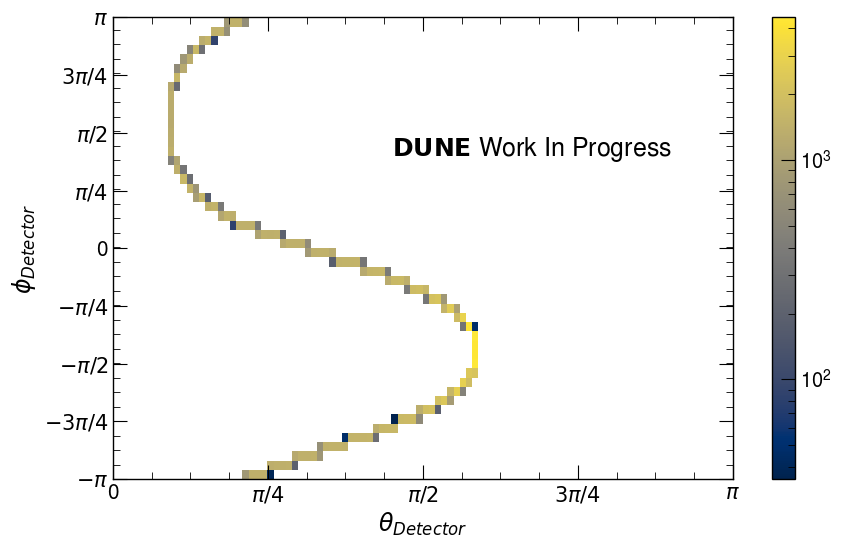

In [4]:
fig, ax = plt.subplots(dpi=100, figsize=(10, 6))

h = ax.hist2d(df.iloc[:,5], df.iloc[:,4], bins = (50,50),  norm = colors.LogNorm(), label = ' GC Position')
ax.set_xlabel(r'$\theta_{Detector}$', fontsize = 17)
ax.set_ylabel(r'$\phi_{Detector}$', fontsize = 17)
ax.set_xticks([0.0,0.78539,1.570,2.356,3.14159])
ax.set_xticklabels([0,r'$\pi / 4$',r'$\pi / 2$', r'$3 \pi / 4$', r'$\pi$'], fontsize = 15)
ax.set_yticks([-3.14559,-2.356,-1.570,-0.78539,0.0,0.78539,1.570,2.356,3.14159])
ax.set_yticklabels([r'$-\pi$',r'$ -3\pi / 4$', r'$-\pi / 2$', r'$-\pi / 4$',0,r'$\pi / 4$',r'$\pi / 2$', r'$3 \pi / 4$', r'$\pi$'], fontsize = 15)
dunestyle.WIP(x=0.45, y=0.70)
fig.colorbar(h[3], ax=ax)
plt.show()

### The SingleGen Module requires a TH2D histogram with the angles XZ and YZ.

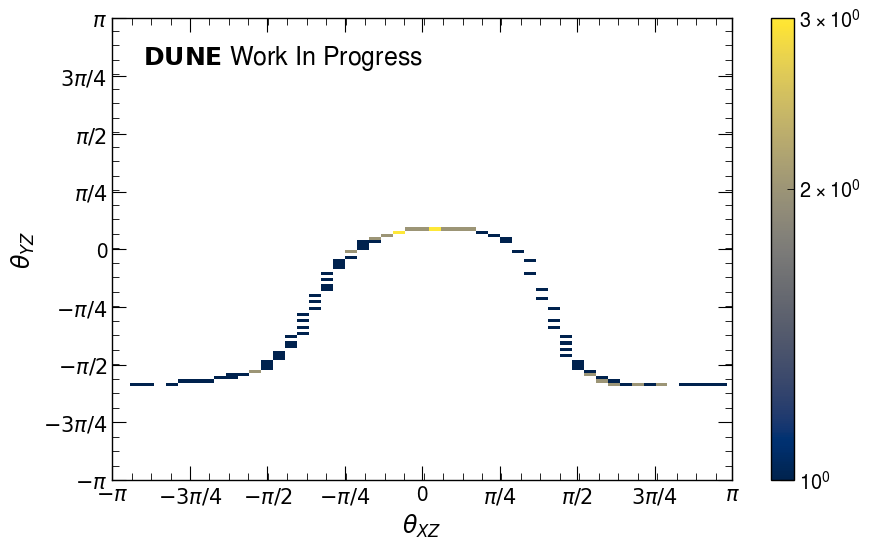

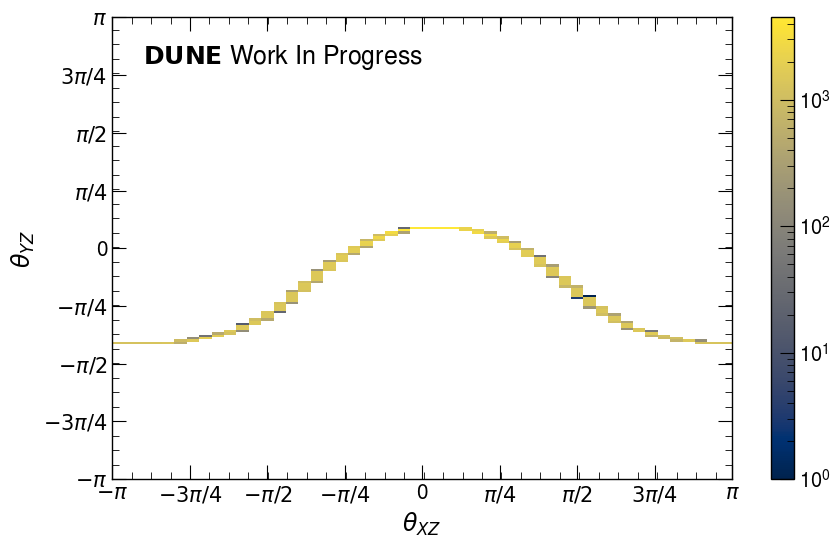

Histogram 'theta_xz_yz' saved in 'angle_distributions.root'


In [7]:

def unit_vector_to_angles_cartesian(x, y, z):
    theta_xz = math.atan2(x, z)  # Angle in radians
    theta_yz = math.atan2(y, z)  # Angle in radians
    return theta_xz, theta_yz

def unit_vector_to_angles_polar(theta,phi):
    theta_xz = math.atan2(math.sin(theta) * math.cos(phi), math.cos(theta))  # Angle in radians
    theta_yz = math.asin(math.sin(theta) * math.sin(phi))  # Angle in radians
    return theta_xz, theta_yz

def plot_fig(theta_xz, theta_yz):
    fig, ax = plt.subplots(dpi=100, figsize=(10, 6))

    h = ax.hist2d(theta_xz, theta_yz, bins = (50,50),  norm = colors.LogNorm(), label = 'GC Position')
    ax.set_xlabel(r'$\theta_{XZ}$', fontsize = 17)
    ax.set_ylabel(r'$\theta_{YZ}$', fontsize = 17)
    ax.set_xticks([-3.14559,-2.356,-1.570,-0.78539,0.0,0.78539,1.570,2.356,3.14159])
    ax.set_xticklabels([r'$-\pi$',r'$ -3\pi / 4$', r'$-\pi / 2$', r'$-\pi / 4$',0,r'$\pi / 4$',r'$\pi / 2$', r'$3 \pi / 4$', r'$\pi$'], fontsize = 15)
    ax.set_yticks([-3.14559,-2.356,-1.570,-0.78539,0.0,0.78539,1.570,2.356,3.14159])
    ax.set_yticklabels([r'$-\pi$',r'$ -3\pi / 4$', r'$-\pi / 2$', r'$-\pi / 4$',0,r'$\pi / 4$',r'$\pi / 2$', r'$3 \pi / 4$', r'$\pi$'], fontsize = 15)
    dunestyle.WIP()
    fig.colorbar(h[3], ax=ax)
    plt.show()

# FYI - thetaxz and thetayz are related to standard polar angles as follows:
# thetaxz = atan2(math.sin(theta) * cos(phi), cos(theta))
# thetayz = asin(sin(theta) * sin(phi));

# Create a ROOT file to store the histograms
root_file_cart = ROOT.TFile("angle_distributions_fromcartesian.root", "RECREATE")

# Create a 2D histogram (TH2F)
hist_name = "theta_xz_yz"
hist = ROOT.TH2F(hist_name, "Theta XZ vs YZ Distribution", 200, -3.14, 3.14, 200, -3.14, 3.14)

x = np.array(df.iloc[:,1][:100])
y = np.array(df.iloc[:,2][:100])
z = np.array(df.iloc[:,3][:100])

ang_xz = []
ang_yz = []

for idx, (xi,yi,zi) in enumerate(zip(x,y,z)):
    
    theta_xz, theta_yz = unit_vector_to_angles_cartesian(xi, yi, zi)
    hist.Fill(theta_xz, theta_yz)
    ang_xz.append(theta_xz)
    ang_yz.append(theta_yz)
# Write the histogram to the file

plot_fig(ang_xz,ang_yz)

hist.Write()

root_file_cart.Close()

ang_xz.clear()
ang_yz.clear()

root_file_polar = ROOT.TFile("angle_distributions.root", "RECREATE")
hist = ROOT.TH2F(hist_name, "Theta XZ vs YZ Distribution", 200, -3.14, 3.14, 200, -3.14, 3.14)

for idx,(theta,phi) in enumerate(zip(df.iloc[:,5],df.iloc[:,4])):
        theta_xz, theta_yz = unit_vector_to_angles_polar(theta,phi)
        hist.Fill(theta_xz, theta_yz)
        ang_xz.append(theta_xz)
        ang_yz.append(theta_yz)
plot_fig(ang_xz,ang_yz)
# Write the histogram to the file
hist.Write()

# Close the file

root_file_polar.Close()

print(f"Histogram '{hist_name}' saved in 'angle_distributions.root'")
